In [2]:
from sympy import *

In [3]:
X = Matrix([[4.1, 3.9],[4.7, 4.2]])
X

Matrix([
[4.1, 3.9],
[4.7, 4.2]])

In [4]:
X_expanded = Matrix([[4.1, 3.9, 4.0],[4.7, 4.2, 4.3]])
X_expanded

Matrix([
[4.1, 3.9, 4.0],
[4.7, 4.2, 4.3]])

In [6]:
a1, a2 = symbols("a1, a2")

In [7]:
linsolve(X_expanded, [a1, a2])

{(-0.0270270270270284, 1.05405405405406)}

In [8]:
a = Matrix([a1, a2])
a

Matrix([
[a1],
[a2]])

In [9]:
X*a

Matrix([
[4.1*a1 + 3.9*a2],
[4.7*a1 + 4.2*a2]])

In [10]:
b = Matrix([4, 4.3])
b

Matrix([
[  4],
[4.3]])

In [11]:
X*a-b

Matrix([
[  4.1*a1 + 3.9*a2 - 4],
[4.7*a1 + 4.2*a2 - 4.3]])

In [15]:
X = Matrix([[2,5],[7, -3]])
X

Matrix([
[2,  5],
[7, -3]])

In [16]:
y = Matrix([2, 3])
y

Matrix([
[2],
[3]])

In [17]:
X*y

Matrix([
[19],
[ 5]])

---


In [18]:
import numpy as np

In [19]:
MSE = 1/4*((4.1*a1 + 3.9*a2 - 4.0)**2 + \
           (4.7*a1 + 4.2*a2 - 4.3)**2 + \
           (3.1*a1 + 2.9*a2 - 3.0)**2 + \
           (4.9*a1 + 5.0*a2 - 4.9)**2)

In [20]:
MSE.subs({a1: 0, a2: 0})

16.8750000000000

In [23]:
dMSEa1 = diff(MSE, a1)
dMSEa1

36.26*a1 + 34.61*a2 - 34.96

In [24]:
dMSEa2 = diff(MSE, a2)
dMSEa2

34.61*a1 + 33.13*a2 - 33.43

In [27]:
def gradient_np(n):
    point = np.array([0, 0])
    for i in range(0, n):
        grad = np.array([dMSEa1.subs({a1: point[0], a2: point[1]}), dMSEa2.subs({a1: point[0], a2: point[1]})])
        point = point + 0.001*-1*grad
    print(f"#{i+1} MSE({point[0]},{point[1]})=",MSE.subs({a1: point[0], a2: point[1]}))   
        

In [28]:
gradient_np(1000)

#1000 MSE(0.496928336748724,0.489701163695613)= 0.00328238641112706


In [29]:
x1, x2 = symbols("x1, x2")
f = 0.5*x1 + 0.5*x2
f

0.5*x1 + 0.5*x2

In [30]:
f.subs({x1: 4.1, x2: 3.9})

4.00000000000000

In [31]:
f.subs({x1: 4.7, x2: 4.2})

4.45000000000000

In [32]:
MSE.subs({a1: 0.5, a2: 0.5})

0.00625000000000002

In [33]:
f.subs({x1: 3.1, x2: 2.9})

3.00000000000000

In [34]:
f.subs({x1: 4.9, x2: 5})

4.95000000000000

---
# Homework
---

### 1. Решите СЛАУ вручную и проверьте себя с помощью sympy.

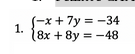

In [36]:
X = Matrix([[-1, 7, -34],[8, 8, -48]])
X

Matrix([
[-1, 7, -34],
[ 8, 8, -48]])

In [37]:
linsolve(X, [a1, a2])

{(-1, -5)}

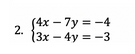

In [39]:
X = Matrix([[4, -7, -4],[3, -4, -3]])
X

Matrix([
[4, -7, -4],
[3, -4, -3]])

In [40]:
linsolve(X, [a1, a2])

{(-1, 0)}

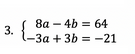

In [41]:
X = Matrix([[8, -4, 64],[-3, 3, -21]])
X

Matrix([
[ 8, -4,  64],
[-3,  3, -21]])

In [43]:
linsolve(X, [a1, a2])

{(9, 2)}

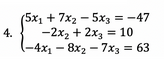

In [45]:
x1, x2, x3 = symbols("x1, x2, x3")

In [46]:
X = Matrix([[5, 7, -5, -47],
            [0, -2, 2, 10], 
            [-4, -8, -7, 63]])
X

Matrix([
[ 5,  7, -5, -47],
[ 0, -2,  2,  10],
[-4, -8, -7,  63]])

In [47]:
linsolve(X, [x1, x2, x3])

{(-2, -6, -1)}

---
### 3. Решите переопределенную СЛАУ. Достигните значения MSE < 55.

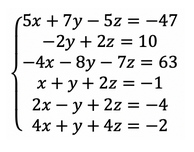

In [48]:
x, y, z = symbols("x, y, z")

In [49]:
MSE = 1/6*((5*x + 7*y - 5*z + 47)**2 + \
           (-2*y + 2*z - 10)**2 + \
           (-4*x - 8*y - 7*z - 63)**2 + \
           (x + y + 2*x + 1)**2 + \
           (2*x - y + 2*z + 4)**2 + \
           (4*x + y + 4*z + 2)**2
          )
MSE

0.166666666666667*(3*x + y + 1)**2 + 0.166666666666667*(-2*y + 2*z - 10)**2 + 0.166666666666667*(-4*x - 8*y - 7*z - 63)**2 + 0.166666666666667*(2*x - y + 2*z + 4)**2 + 0.166666666666667*(4*x + y + 4*z + 2)**2 + 0.166666666666667*(5*x + 7*y - 5*z + 47)**2

In [50]:
dMSEx = diff(MSE, x)
dMSEx

23.3333333333333*x + 24.0*y + 7.66666666666667*z + 168.666666666667

In [51]:
dMSEy = diff(MSE, y)
dMSEy

24.0*x + 40.0*y + 6.33333333333333*z + 284.0

In [52]:
dMSEz = diff(MSE, z)
dMSEz

7.66666666666667*x + 6.33333333333333*y + 32.6666666666667*z + 67.3333333333333

In [58]:
def gradient_np(n):
    point = np.array([0, 0, 0])
    for i in range(0, n):
        grad = np.array([
            dMSEx.subs({x: point[0], y: point[1], z: point[2]}), 
            dMSEy.subs({x: point[0], y: point[1], z: point[2]}), 
            dMSEz.subs({x: point[0], y: point[1], z: point[2]}), 
        ])
        point = point + 0.001*-1*grad
    print(f"#{i+1} MSE({point[0]},{point[1]}, {point[2]})=",MSE.subs({x: point[0], y: point[1], z: point[2]}))   
        

In [59]:
gradient_np(1000)

#1000 MSE(0.518405776946695,-7.28823479945239, -0.769652959059809)= 32.5561317309992
